# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [2]:
df=pd.read_csv('Data file.csv')
df.head(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# Shape & Type of Data

In [4]:
df.shape

(209593, 36)

In [5]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [6]:
df['pdate'].str.replace("-","").astype(int)

0         20160720
1         20160810
2         20160819
3         20160606
4         20160622
            ...   
209588    20160617
209589    20160612
209590    20160729
209591    20160725
209592    20160707
Name: pdate, Length: 209593, dtype: int32

In [7]:
le=LabelEncoder()
df['msisdn']=le.fit_transform(df['msisdn'])
df['pcircle']=le.fit_transform(df['pcircle'])
df['pdate']=le.fit_transform(df['pdate'])

df.dtypes

label                     int64
msisdn                    int32
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [8]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int32  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

<AxesSubplot:>

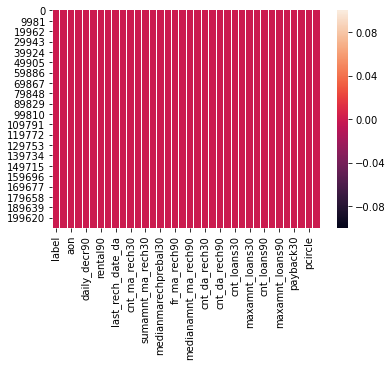

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000
mean,0.875177,93100.650179,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,0.0,37.512646
std,0.330519,53758.461427,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.0,21.989630
min,0.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,46506.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.0,19.000000
50%,1.000000,93073.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,0.0,37.000000
75%,1.000000,139626.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,0.0,55.000000
max,1.000000,186242.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,0.0,81.000000


In [12]:
dfcor=df.corr()

In [13]:
dfcor

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
label,1.000000,0.001976,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,NaN,0.162687
msisdn,0.001976,1.000000,0.000566,0.000717,0.000950,-0.001404,-0.000691,-0.000928,0.001400,-0.002368,...,-0.000755,0.000986,0.001859,-0.000155,0.003286,0.001210,0.002922,0.002671,NaN,-0.002085
aon,-0.003785,0.000566,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,NaN,-0.001650
daily_decr30,0.168298,0.000717,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,NaN,0.534191
daily_decr90,0.166150,0.000950,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,NaN,0.545599
rental30,0.058085,-0.001404,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,NaN,0.388352
rental90,0.075521,-0.000691,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,NaN,0.443884
last_rech_date_ma,0.003728,-0.000928,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,NaN,-0.000976
last_rech_date_da,0.001711,0.001400,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,NaN,-0.001607
last_rech_amt_ma,0.131804,-0.002368,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,NaN,0.110077


In [14]:
df.drop(['pcircle'], axis = 1, inplace = True)

Used seaborn to find NAN(Not a Number)

<AxesSubplot:>

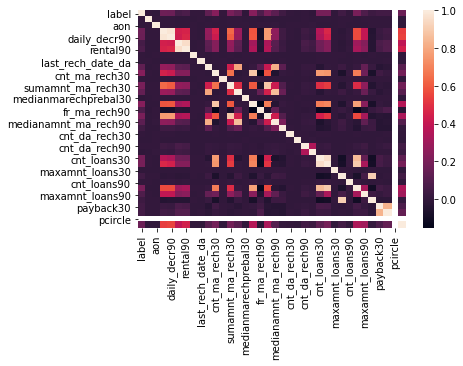

In [15]:
sns.heatmap(dfcor)

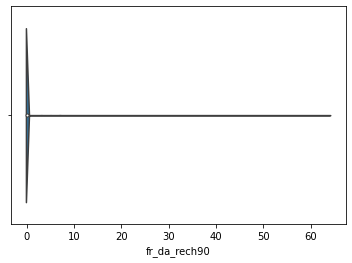

In [16]:

sns.violinplot(x='fr_da_rech90',data=df)
plt.show()

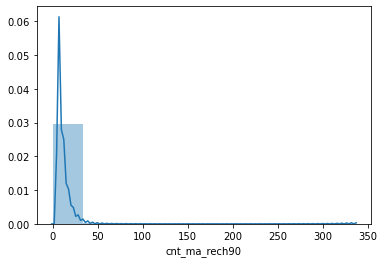

In [17]:
sns.distplot(df['cnt_ma_rech90'],bins=10)
plt.show()

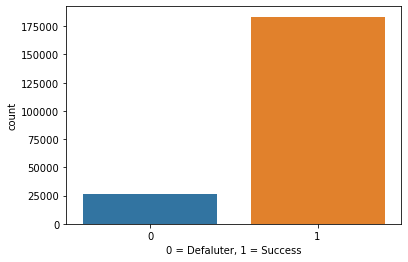

In [18]:
sns.countplot(x='label',data=df)
plt.xlabel('0 = Defaluter, 1 = Success')
plt.show()

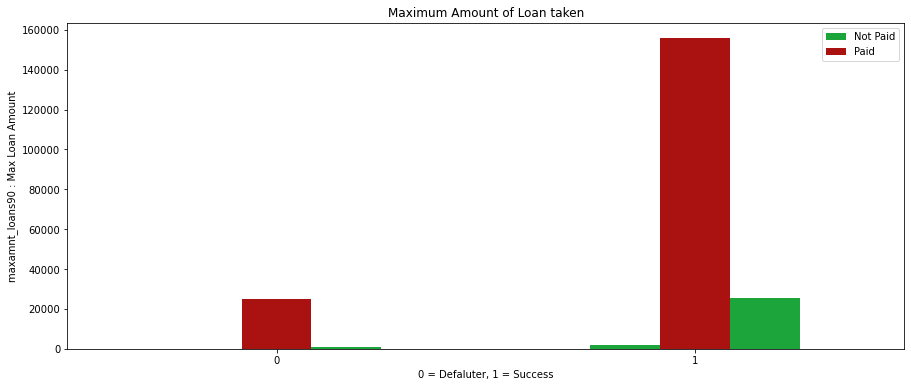

In [19]:
pd.crosstab(df.label,df.maxamnt_loans90).plot(kind='bar',figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Maximum Amount of Loan taken')
plt.xlabel('0 = Defaluter, 1 = Success')
plt.xticks(rotation=0)
plt.legend(['Not Paid', 'Paid'])
plt.ylabel('maxamnt_loans90 : Max Loan Amount')
plt.show()

<AxesSubplot:xlabel='label', ylabel='payback90'>

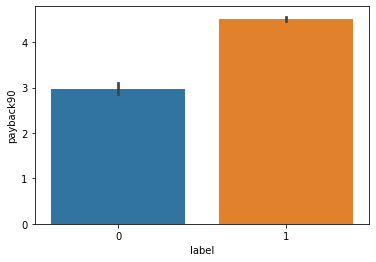

In [20]:
sns.barplot(x=df['label'],y=df['payback90'],data=df)

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='label'>

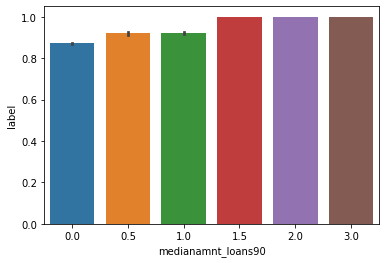

In [21]:
sns.barplot(x='medianamnt_loans90',y='label',data=df)

<AxesSubplot:>

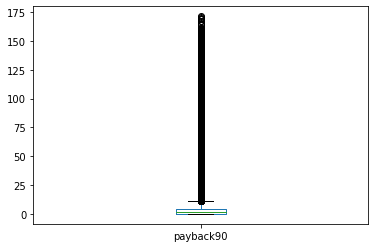

In [22]:
df['payback90'].plot.box()

<AxesSubplot:>

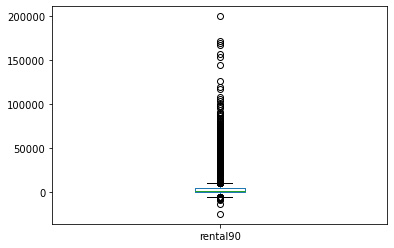

In [23]:
df['rental90'].plot.box()

In [24]:
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [25]:
zscore = abs(zscore(df))

In [26]:
print(df.shape)

(209593, 35)


In [27]:
threshold = 3

In [28]:
print(np.where(zscore>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([16, 16, 33, ..., 29, 27, 31], dtype=int64))


In [29]:
df_new=df[(zscore<3).all(axis=1)]

In [30]:
df.shape

(209593, 35)

In [31]:
df_new.shape

(161465, 35)

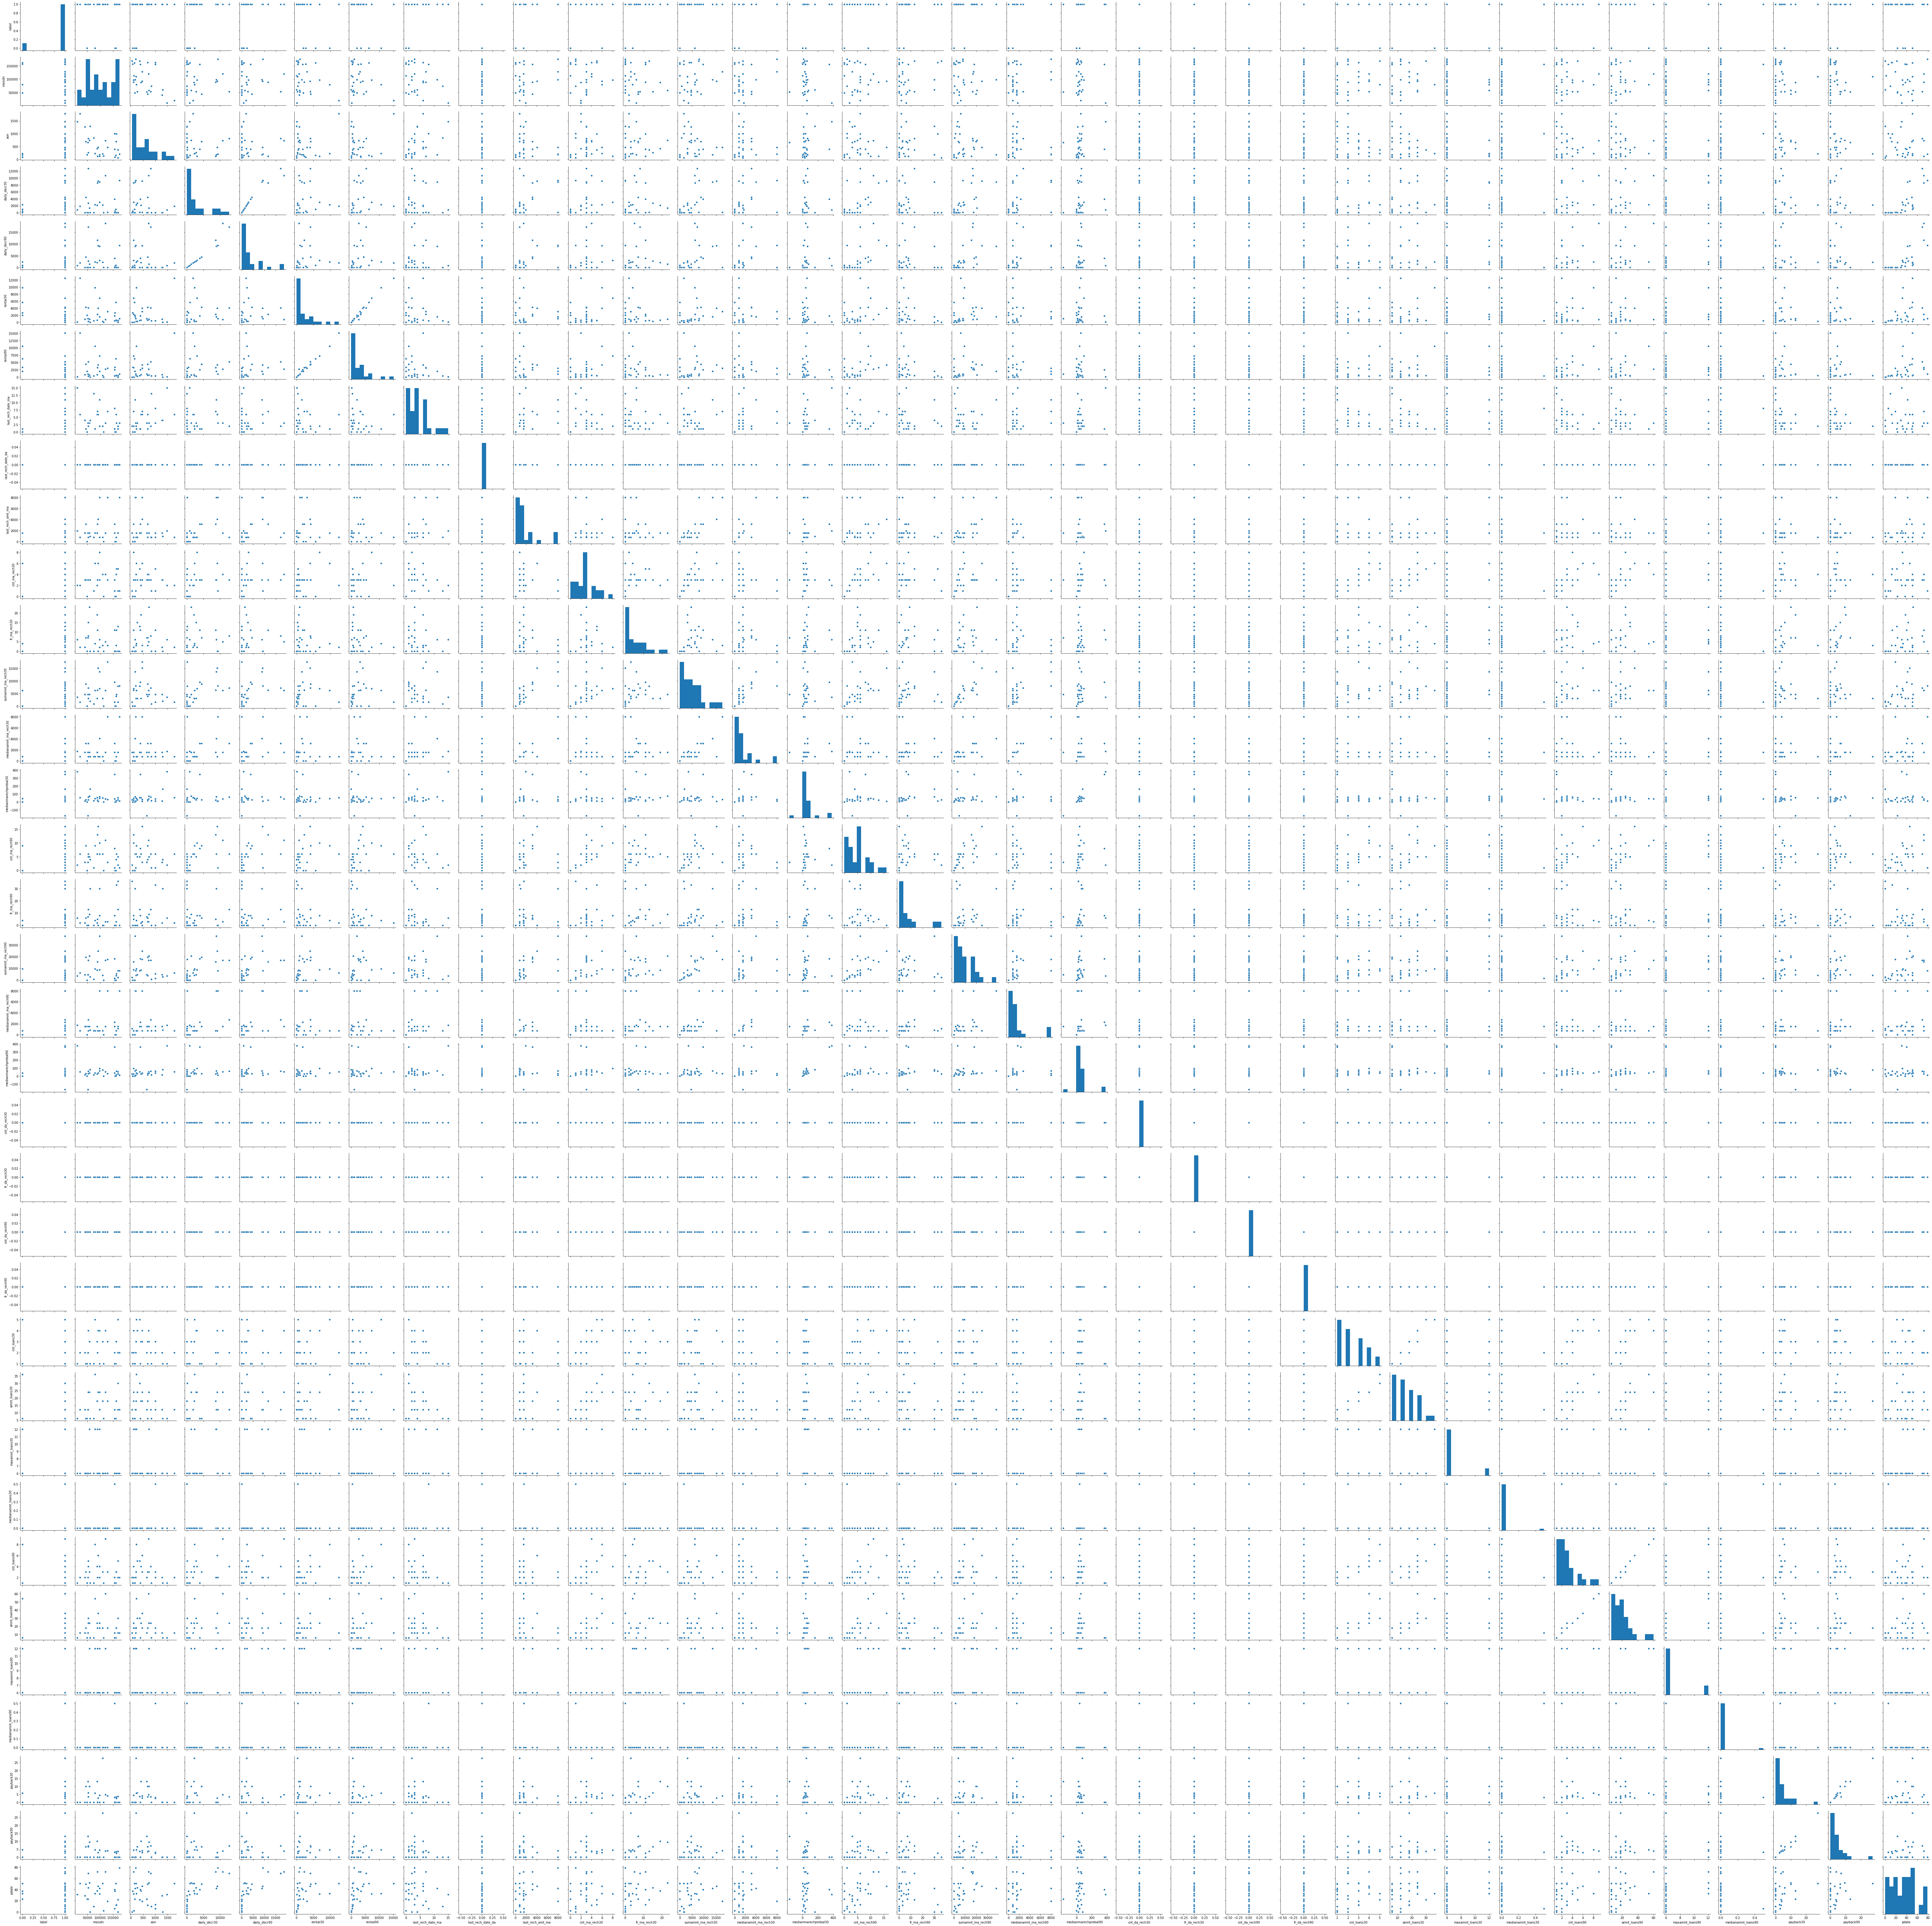

In [32]:
sns.pairplot(df_new.sample(30))

In [33]:
sc = StandardScaler()

In [34]:
x = sc.fit_transform(df_new)

In [35]:
x = pd.DataFrame(x,columns=df_new.columns)

In [36]:
x.shape

(161465, 35)

In [37]:
pca=PCA(n_components=10)

In [38]:
x=pca.fit_transform(x)

In [39]:
y=df_new.iloc[:,0].values

In [40]:
print(y)

[0 1 1 ... 1 1 1]


In [41]:
le=LabelEncoder()
y=le.fit_transform(y)

In [42]:
print(y)

[0 1 1 ... 1 1 1]


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

In [44]:
print(x_train.shape,x_test.shape)

(129172, 10) (32293, 10)


In [45]:
print(y_train.shape,y_test.shape)

(129172,) (32293,)


In [46]:
LR=LogisticRegression()

In [47]:
DT=DecisionTreeClassifier(random_state=6)

In [48]:
GNB=GaussianNB()

In [49]:
models = []

In [50]:
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [51]:
Model = []
score = []
cvs=[]
rocscore=[]

Model : LogisticRegression
LogisticRegression()
Accuracy_Score =  0.940885021521692
Cross_Val_Score =  0.9400489330916575
roc_auc_score =  0.8267346879157228
Classification_report
               precision    recall  f1-score   support

           0       0.88      0.67      0.76      4480
           1       0.95      0.98      0.97     27813

    accuracy                           0.94     32293
   macro avg       0.91      0.83      0.86     32293
weighted avg       0.94      0.94      0.94     32293

[[ 2996  1484]
 [  425 27388]]
AxesSubplot(0.125,0.808774;0.62x0.0712264)
Model : DecisionTreeClassifier
DecisionTreeClassifier(random_state=6)
Accuracy_Score =  0.9580404422010962
Cross_Val_Score =  0.9580776116978831
roc_auc_score =  0.9133769786161148
Classification_report
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4480
           1       0.98      0.98      0.98     27813

    accuracy                           0.96     32

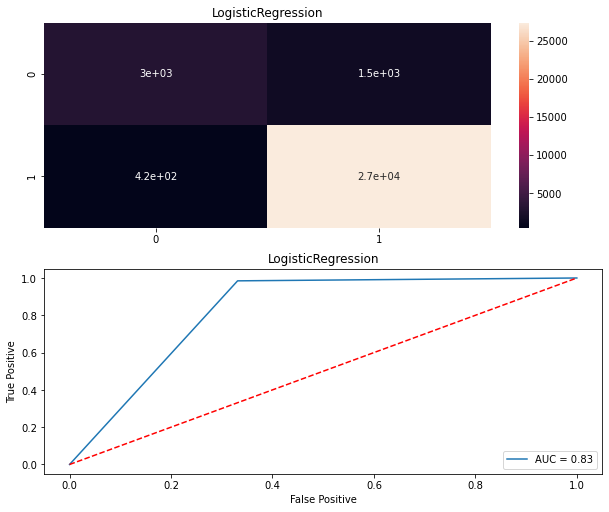

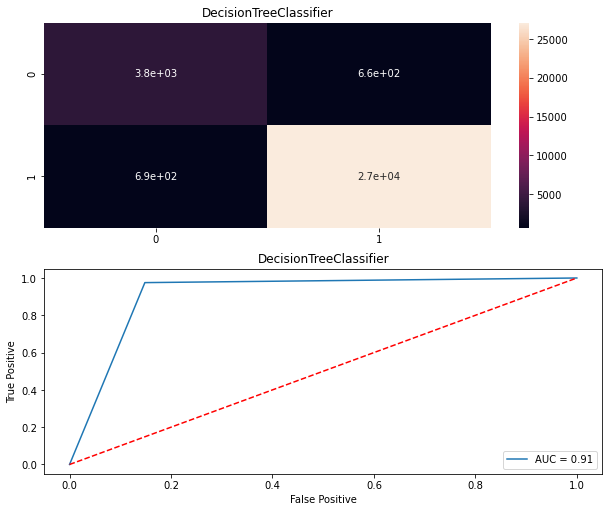

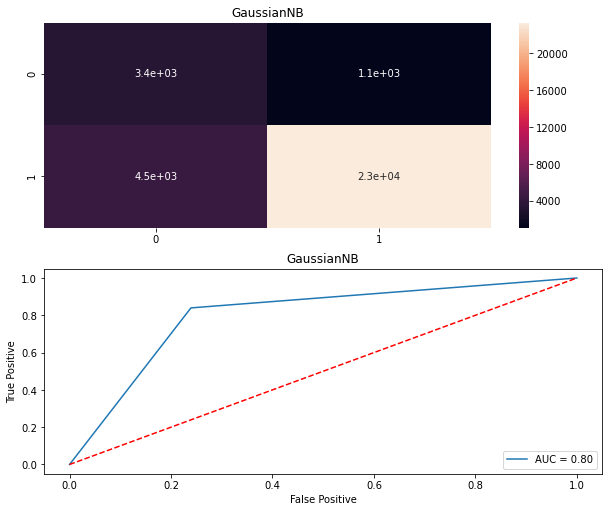

In [52]:
for n_model,model in models:
    print(f"Model : {n_model}")
    Model.append(n_model)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    print('Accuracy_Score = ',AS)
    score.append(AS*100)
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('Classification_report\n',classification_report(y_test,pre))
    cm=confusion_matrix(y_test,pre)
    print(cm)
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(n_model)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(n_model)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive')
    plt.xlabel('False Positive')

In [53]:
Output = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})

In [54]:
Output

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,94.088502,94.004893,82.673469
1,DecisionTreeClassifier,95.804044,95.807761,91.337698
2,GaussianNB,82.872449,83.196982,80.019679


# Result-